In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
pd.options.display.float_format = "{:.4f}".format

In [174]:
class StockAnalyser():
    def __init__(self, ticker, start, end):
        self.__ticker = ticker
        self.__start = start
        self.__end = end
        self.__get_data()
        self.__calc_log_returns()
    def __repr__(self): #string method
        return ("StockAnalyser for {}: Start = {}, End = {}".format(self.__ticker,self.__start,self.__end))
    def __get_data(self):
        """
            loads financial data from yfinance
        """
        raw = yf.download(self.__ticker, self.__start, self.__end)
        raw = raw["Close"].to_frame()
        raw.rename(columns = {"Close":"Price"}, inplace = True)
        self.data = raw
    def __calc_log_returns(self):
        self.data["log_ret"] = np.log(self.data.Price/self.data.Price.shift(1))

    def plot_prices(self):
        self.data.Price.plot(figsize = (12,8), fontsize = 13)
        plt.title("Prices trend: {}".format(self.__ticker), fontsize = 20)
        plt.show()
    def plot_returns(self, kind = "ts"):
        if type(kind) != str:
            raise TypeError("'kind' parameter takes in a String.")
        if kind not in ["ts", "hist"]:
            raise Exception ("format not supported, use either ts[time series] or hist[histogram]")

        if kind == "ts":
            self.data.log_ret.plot(figsize = (12,8), fontsize = 13)
            plt.title("Log Returns: {}".format(self.__ticker), fontsize = 20)
            plt.show()
        elif kind == "hist":
            #genral rule of thumb, bins = sqrt(number of data points)
            self.data.log_ret.plot(kind = "hist", bins = int(np.sqrt(len(self.data))), figsize = (12,8), fontsize = 13)
            plt.title("Freq of Returns: {}".format(self.__ticker), fontsize = 20)
            plt.show()
    def set_ticker(self, ticker = None): #ticker symbol set to None by default
        if  ticker != None:
            self.__ticker = ticker #replace old ticker symbol
            self.__get_data() #loads the new data
            self.__calc_log_returns()
        
            


__instantiate__

In [175]:
stock = StockAnalyser("AAPL", "2015-01-01","2019-12-31")

[*********************100%%**********************]  1 of 1 completed


In [176]:
stock #test string method

StockAnalyser for AAPL: Start = 2015-01-01, End = 2019-12-31

In [177]:
stock.data

,Price,log_ret
Date,,
2015-01-02,27.3325,NaN
2015-01-05,26.5625,-0.0286
2015-01-06,26.5650,0.0001
2015-01-07,26.9375,0.0139
2015-01-08,27.9725,0.0377
...,...,...
2019-12-23,71.0000,0.0162
2019-12-24,71.0675,0.0010
2019-12-26,72.4775,0.0196


### test plotting

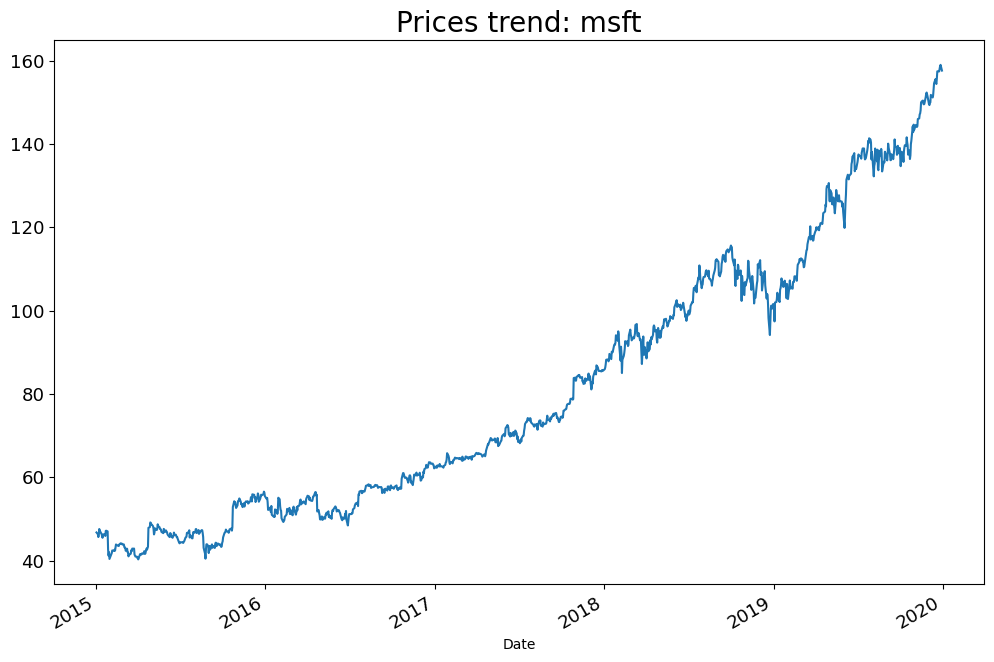

In [163]:
stock.plot_prices()

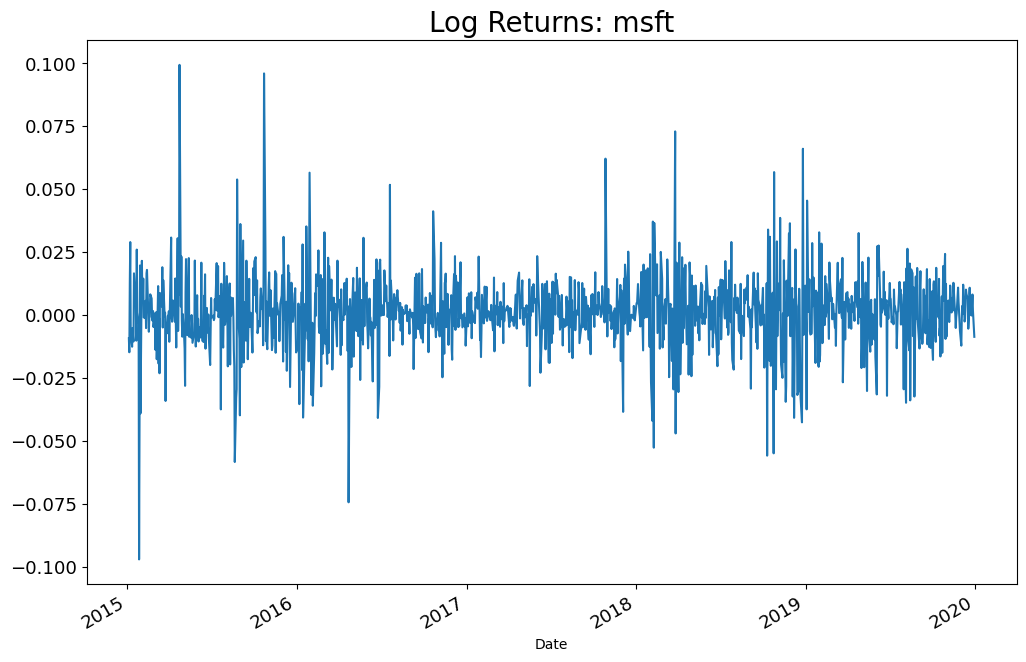

In [164]:
stock.plot_returns()

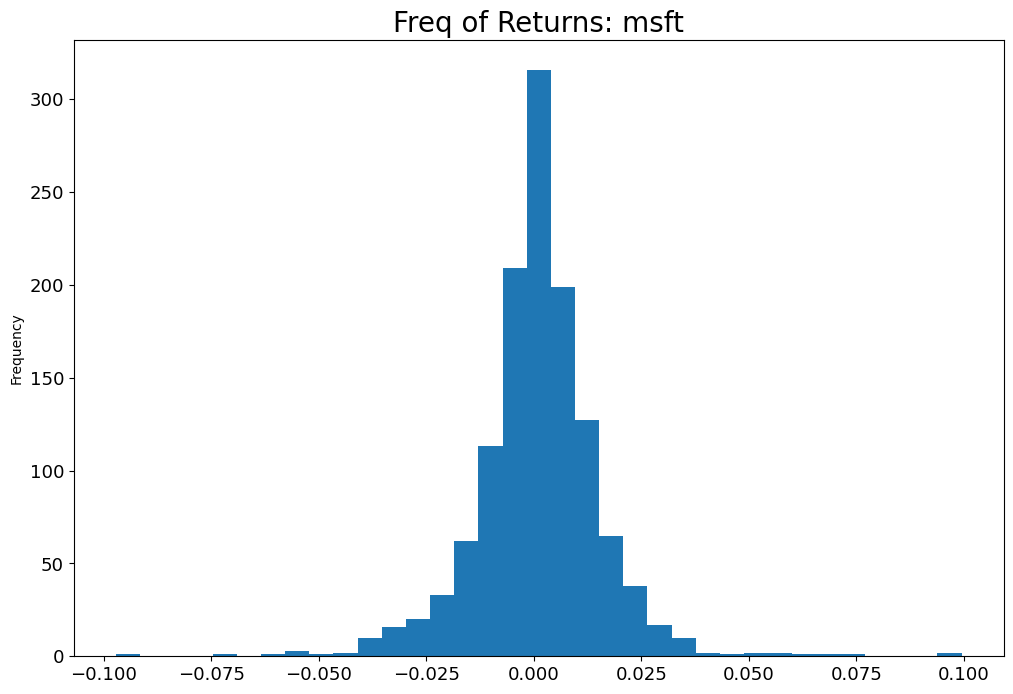

In [165]:
stock.plot_returns(kind = "hist")